# Exercises Lecture 12: Topic Modeling (Gensim)

In this notebook, we use LDA to perform topic modeling on a corpus of Wikipedia articles from 16 categories:

Airports, Artists, Astronauts, Astronomical_objects, Building,City,Comics_characters, Companies,Foods, Monuments_and_memorials,Politicians,Sports_teams,Sportspeople, Transport, Universities_and_colleges, Written_communication..

The assignment involves the following steps:

* Preparing the data  
* Training an LDA model
* Interpreting the results of the LDA model
   - Printing out the topk relevant tokens for each topic
   - Computing coherence
   - Visualising the topic graph

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- WordCloud
- gensim for topic modeling  

Cheat sheets
- clustering_cheat_sheet.ipynb   
- topic_modeling_cheat_sheet.ipynb
 

#### Installing dependent packages

In [1]:
# To be run only once
!pip install gensim
!pip install PyLDAvis
#!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
      --------------------------------------- 0.4/24.0 MB 11.9 MB/s eta 0:00:02
     - -------------------------------------- 1.1/24.0 MB 14.0 MB/s eta 0:00:02
     ---- ----------------------------------- 2.5/24.0 MB 20.2 MB/s eta 0:00:02
     ----- ---------------------------------- 3.1/24.0 MB 22.2 MB/s eta 0:00:01
     ----- ---------------------------------- 3.1/24.0 MB 22.2 MB/s eta 0:00:01
     ----- ---------------------------------- 3.1/24.0 MB 22.2 MB/s eta 0:00:01
     ------- -------------------------------- 4.6/24.0 MB 14.8 MB/s eta 0:00:02
     ---------- ----------------------------- 6.5/24.0 MB 17.2 MB/s eta 0:00:02
     -------------- ------------------------- 8.9/24.0 MB 21.1 MB/s eta 0:00:01
     ------------------ -------------------- 11.1/24.0 MB 25.2 MB/s eta 0:00:01
     --------------------- ----------------- 13.4/24.0 MB 43.5 MB/s eta 0:00:01
     ------------------------- ------------- 15.

## Generating a word cloud

**Exercise 1** 

* Create a pandas dataframe called "df" containing a column with header "text" for the text of each Wikipedia article included in  "wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. clustering CS) 

In [9]:
import pandas as pd
from sklearn.datasets import load_files
# Loading all files in "dir" directory into a pandas dataframe
DATA_DIR = "../class10-clustering/wkp_sorted/"

# YOUR CODE HERE
data = load_files(DATA_DIR, encoding='utf-8', decode_error='replace', shuffle=False)
df = pd.DataFrame(data.data, columns=['text'])
print(df.shape)
df.head()

(160, 1)


,text
0,An airport authority is an independent entity ...
1,"An airport bus, or airport shuttle bus or airp..."
2,Airport check-in is the process whereby passen...
3,Airport security refers to the techniques and ...
4,Airports of Serbia (Serbian Cyrillic: Аеродром...


**Exercise 2:** Generate a word cloud (topic_modeling CS)

* The WordCloud method takes as input the corpus as a single string. 
* Use pandas str.cat method to concatenate the content of the "story_str" column into a single string

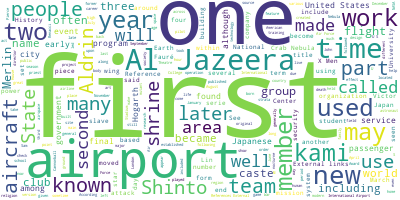

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the synopses into a single string.
#long_string = movies.str.cat(sep=" ")

long_string = df['text'].str.cat(sep=" ")
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Pre-processing the data

**Exercise 3:** Preparing the corpus for topic modeling

Gensim topic modeling module takes as input a list of tokens.

 - Define a clean_up function which takes as input a list of texts and outputs the list of lemmas for tokens in the input which :
* are not stop words  
* only contains characters (python_basic CS) 
* whose length is greater than 2
* whose spacy POS tag is not 'ADV','PRON','CCONJ','PUNCT','PART','DET','ADP'or 'SPACE'  (spacy CS)

- Apply this function to the 'text' column of the Wikipedia dataframe    
_**Help**_ : use pandas apply method. Check linguistic preprocessing CS (NLTK, Stanza, Spacy)

In [22]:
## YOUR clean_up fonction here
import spacy

nlp = spacy.load('en_core_web_sm')
UNDESIRED_POS = ["ADV", "PRON", "CCONJ", "PUNCT", "PART", "DET", "SPACE", "ADP"]

def clean_up(text):

    lemmas = set()
    # analyse the text with Spacy
    doc = nlp(text)

    # Keep only tokens with the desired properties
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.pos_ not in UNDESIRED_POS]
    lemmas.update(tokens)

    return list(lemmas)

In [23]:

# Apply your clean_up fonction to the "text" column of your dataframe
# the result should be a list of lists of tokens (each list of tokens corresonds to one of the Wikipedia files)

df["tokens"] = df["text"].apply(clean_up)
df.head()

,text,tokens
0,An airport authority is an independent entity ...,"[Edmonton, example, Yai, Newark, international..."
1,"An airport bus, or airport shuttle bus or airp...","[space, example, Newark, service, mover, store..."
2,Airport check-in is the process whereby passen...,"[browser, available, example, program, EVA, co..."
3,Airport security refers to the techniques and ...,"[space, example, Ariel, program, Europea, Offi..."
4,Airports of Serbia (Serbian Cyrillic: Аеродром...,"[french, form, maintenance, Аеродроми, Airport..."


## Learn a topic model

**Exercise 4:** Create a vocabulary for the lda model and convert your list of list of lemmas into a document-term matrix

* Use [Gensim dictionary method](https://radimrehurek.com/gensim/corpora/dictionary.html) to create a dictionary 
* Use Gensim doc2bow method (from Corpora module) to convert each synopsis to a list of integers

**N.B.** If you did not finish Exercise 3, you can upload the cleaned up text from the clean_wkp.csv file

In [ ]:
# YOUR CODE HERE (check the Topic Modeling CS)

**Exercise 5:** Create an LDA model with 16 topics and apply it to your data

In [ ]:
# YOUR CODE HERE (check the Topic Modeling CS)

**Exercise 6:** Print out the keywords of the 16 topics (Airports, Artists, Astronauts, Astronomical_objects, Building,City,Comics_characters, Companies,Foods, Monuments_and_memorials,Politicians,Sports_teams,Sportspeople, Transport, Universities_and_colleges, Written_communication)


Each topic is a combination of keywords.

* Use `lda_model.print_topics()` to see the keywords for each topic and the weight of each keyword for that topic
* Retrain you LDA model with different numbers of topics and examine the top keywords to determine which number of topics is best
* Can you match the topics to the Wikipedia categories ?

In [ ]:
# YOUR CODE HERE (check the Topic Modeling CS)

## Evaluate your model

**Exercise 7:** Compute Model Perplexity and Coherence Score

* A lower perplexity score indicates better generalization performance
* Coherence measures score a  topic by measuring the degree of semantic similarity between high scoring words in the topic.

1. `C_v` measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
2. `C_p` is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson's coherence
3. `C_uci` measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
4. `C_umass` is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
5. `C_npmi` is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
6. `C_a` is based on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarit

In [ ]:
# YOUR CODE HERE (check the Topic Modeling CS)

**Visualize the topic model using pyLDAvis (PROVIDED)**

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

### Hyperparameter tuning (PROVIDED)

First, let's differentiate between model hyperparameters and model parameters :

- `Model hyperparameters` can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

- `Model parameters` can be thought of as what the model learns during training, such as the weights for each word in a given topic.

Now that we have the baseline coherence score for the default LDA model, let's perform a series of sensitivity tests to help determine the following model hyperparameters: 
- Number of Topics (K)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

We'll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two difference validation corpus sets. We'll use `C_v` as our choice of metric for performance comparison 

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_term_matrix, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

Let's call the function, and iterate it over the range of topics, alpha, and beta parameter values

In [ ]:
import numpy as np
import tqdm
import gensim

corpus = doc_term_matrix
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

### Final Model Training

Based on external evaluation (Code to be added from Excel based analysis), train the final model

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=16, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('Perplexity:', lda_model.log_perplexity(doc_term_matrix))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmas_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)